In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
df


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


<Axes: xlabel='ds', ylabel='y'>

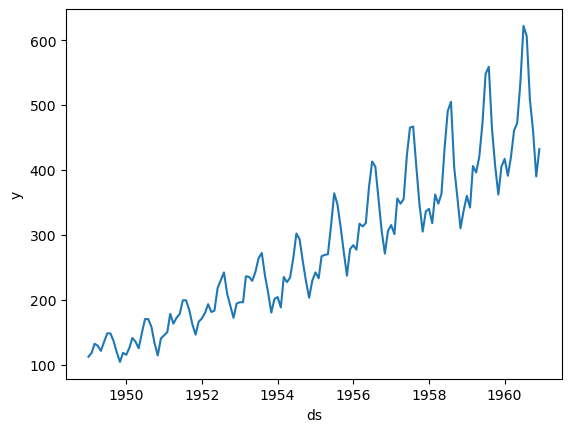

In [3]:
time = pd.to_datetime(df['ds'])
sns.lineplot(x=time, y=df['y'])

In [4]:
df.info()
# 欠損なし

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


## 予測モデルの学習

In [5]:
from prophet import Prophet
model = Prophet()

In [6]:
model.fit(df)

23:26:55 - cmdstanpy - INFO - Chain [1] start processing
23:26:55 - cmdstanpy - INFO - Chain [1] done processing


##　予測

In [7]:
future = model.make_future_dataframe(periods=36, freq='MS')
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [8]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.253948,56.041392,112.440255,107.253948,107.253948,-21.389753,-21.389753,-21.389753,-21.389753,-21.389753,-21.389753,0.0,0.0,0.0,85.864195
1,1949-02-01,109.404281,50.115227,108.300513,109.404281,109.404281,-30.067255,-30.067255,-30.067255,-30.067255,-30.067255,-30.067255,0.0,0.0,0.0,79.337026
2,1949-03-01,111.346517,80.987159,140.849027,111.346517,111.346517,-0.439217,-0.439217,-0.439217,-0.439217,-0.439217,-0.439217,0.0,0.0,0.0,110.907300
3,1949-04-01,113.496850,79.541767,137.955661,113.496850,113.496850,-4.957559,-4.957559,-4.957559,-4.957559,-4.957559,-4.957559,0.0,0.0,0.0,108.539291
4,1949-05-01,115.577817,84.580465,141.657839,115.577817,115.577817,-3.683712,-3.683712,-3.683712,-3.683712,-3.683712,-3.683712,0.0,0.0,0.0,111.894105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,582.573760,621.809164,678.442041,579.457532,585.482766,67.607972,67.607972,67.607972,67.607972,67.607972,67.607972,0.0,0.0,0.0,650.181732
176,1963-09-01,585.698049,573.221396,631.128201,582.471011,588.749839,17.199471,17.199471,17.199471,17.199471,17.199471,17.199471,0.0,0.0,0.0,602.897520
177,1963-10-01,588.721554,536.732795,595.826885,585.401719,591.873737,-22.048976,-22.048976,-22.048976,-22.048976,-22.048976,-22.048976,0.0,0.0,0.0,566.672579
178,1963-11-01,591.845844,507.292142,563.839716,588.346053,595.153854,-57.008999,-57.008999,-57.008999,-57.008999,-57.008999,-57.008999,0.0,0.0,0.0,534.836844


In [9]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,85.864195,56.041392,112.440255
1,1949-02-01,79.337026,50.115227,108.300513
2,1949-03-01,110.907300,80.987159,140.849027
3,1949-04-01,108.539291,79.541767,137.955661
4,1949-05-01,111.894105,84.580465,141.657839
...,...,...,...,...
175,1963-08-01,650.181732,621.809164,678.442041
176,1963-09-01,602.897520,573.221396,631.128201
177,1963-10-01,566.672579,536.732795,595.826885
178,1963-11-01,534.836844,507.292142,563.839716


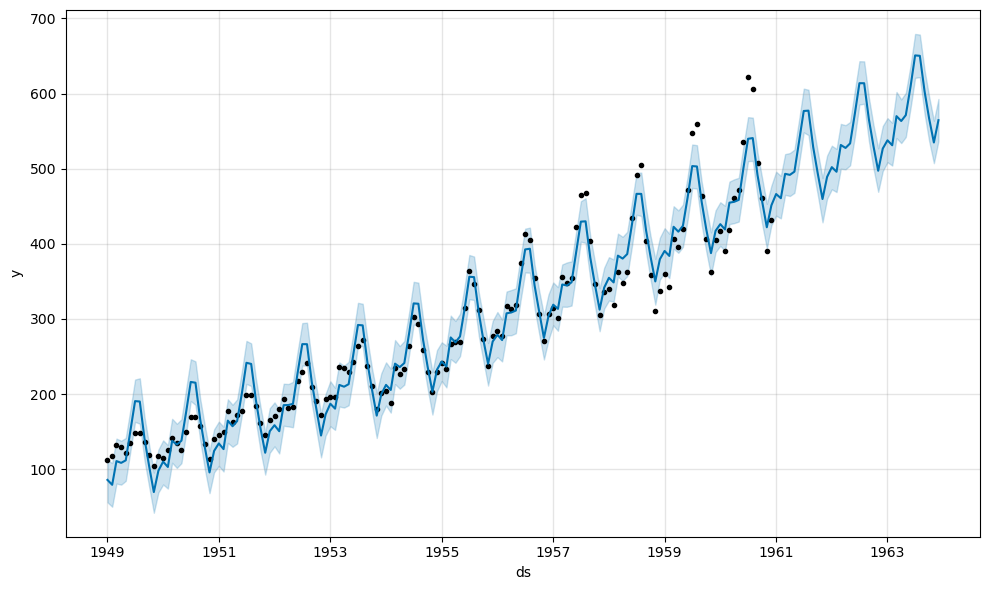

In [10]:
#グラフ
fig_forcast = model.plot(forecast)

## 予測の評価